In [1]:
# packages required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, t
from scipy.special import gamma
from scipy.optimize import minimize

# Part 4

In [2]:
# import data
df = pd.read_csv("csv files/sp500_vix_returns.csv")

# inspect data
print(df.head())

         Date       rsp      rvix
0  1992-01-03  0.497249 -1.061022
1  1992-01-06 -0.329632  1.113770
2  1992-01-07 -0.134073  1.414009
3  1992-01-08  0.167567 -2.687910
4  1992-01-09 -0.117271  1.273901


In [3]:
# extract sp and vix returns columns and store them as separate variables
sp_returns = df["rsp"]
vix_returns = df["rvix"]

# inspect the extracted variables
print(sp_returns.head())
print(vix_returns.head())

0    0.497249
1   -0.329632
2   -0.134073
3    0.167567
4   -0.117271
Name: rsp, dtype: float64
0   -1.061022
1    1.113770
2    1.414009
3   -2.687910
4    1.273901
Name: rvix, dtype: float64


In [4]:
# calculate mean for both variables
sp_mu = sp_returns.mean()
vix_mu = vix_returns.mean()

# inspect calculated means
print(f"S&P 500 μ return: {sp_mu}")
print(f"VIX μ return: {vix_mu}")

# calculate standard deviation for both variables
sp_sigma = sp_returns.std()
vix_sigma = vix_returns.std()

# inspect calculated standard deviations
print(f"S&P 500 σ return: {sp_sigma}")
print(f"VIX σ return: {vix_sigma}")

S&P 500 μ return: 0.0329061734056763
VIX μ return: -0.002142420973572164
S&P 500 σ return: 1.1504163835450734
VIX σ return: 6.802960621563377


## If Gaussian model is selected

In [5]:
# defining gaussian mgf for both variables
def sp_gaussian_mgf(t):
    return np.exp(sp_mu * t + 0.5 * sp_sigma**2 * t**2)
    
def vix_gaussian_mgf(t):
    return np.exp(vix_mu * t + 0.5 * vix_sigma**2 * t**2)

# example usage when t = -1, 0, 1 for both variables
print("S&P 500 Gaussian MGF at t=-1:", sp_gaussian_mgf(-1))
print("S&P 500 Gaussian MGF at t=0:", sp_gaussian_mgf(0))
print("S&P 500 Gaussian MGF at t=1:", sp_gaussian_mgf(1))

print("VIX 500 Gaussian MGF at t=-1:", vix_gaussian_mgf(-1))
print("VIX 500 Gaussian MGF at t=0:", vix_gaussian_mgf(0))
print("VIX 500 Gaussian MGF at t=1:", vix_gaussian_mgf(1))

S&P 500 Gaussian MGF at t=-1: 1.8754014709806917
S&P 500 Gaussian MGF at t=0: 1.0
S&P 500 Gaussian MGF at t=1: 2.0029780562265778
VIX 500 Gaussian MGF at t=-1: 11234767299.279608
VIX 500 Gaussian MGF at t=0: 1.0
VIX 500 Gaussian MGF at t=1: 11186731084.378384


## If Skew-t model is selected

In [6]:
# defining skew-t empirical mgf for both variables
def sp_skewt_empirical_mgf(t):
    return np.mean(np.exp(t * sp_returns))

def vix_skewt_empirical_mgf(t):
    return np.mean(np.exp(t * vix_returns))

# example usage when t = -1, 0, 1 for both variables
print("S&P 500 Skew-t Empirical MGF at t=-1:", sp_skewt_empirical_mgf(-1))
print("S&P 500 Skew-t Empirical MGF at t=0:", sp_skewt_empirical_mgf(0))
print("S&P 500 Skew-t Empirical MGF at t=1:", sp_skewt_empirical_mgf(1))

print("VIX Skew-t Empirical MGF at t=-1:", vix_skewt_empirical_mgf(-1))
print("VIX Skew-t Empirical MGF at t=0:", vix_skewt_empirical_mgf(0))
print("VIX Skew-t Empirical MGF at t=1:", vix_skewt_empirical_mgf(1))

S&P 500 Skew-t Empirical MGF at t=-1: 51.31018491423595
S&P 500 Skew-t Empirical MGF at t=0: 1.0
S&P 500 Skew-t Empirical MGF at t=1: 15.506043357755908
VIX Skew-t Empirical MGF at t=-1: 1928293941162776.5
VIX Skew-t Empirical MGF at t=0: 1.0
VIX Skew-t Empirical MGF at t=1: 2.7181476053111063e+29


The MGF for the Skew-t distribution does not have a closed form, so we rely on the empirical MGF computed from the data. VIX exhibits far more pronounced heavy tails than S&P 500, based on their respective M(-1) and M(1) values.

# Part 5

In [7]:
# create grids for both variables
sp_x = np.linspace(min(sp_returns), max(sp_returns), 500)
vix_x = np.linspace(min(vix_returns), max(vix_returns), 500)

## If Gaussian model is selected

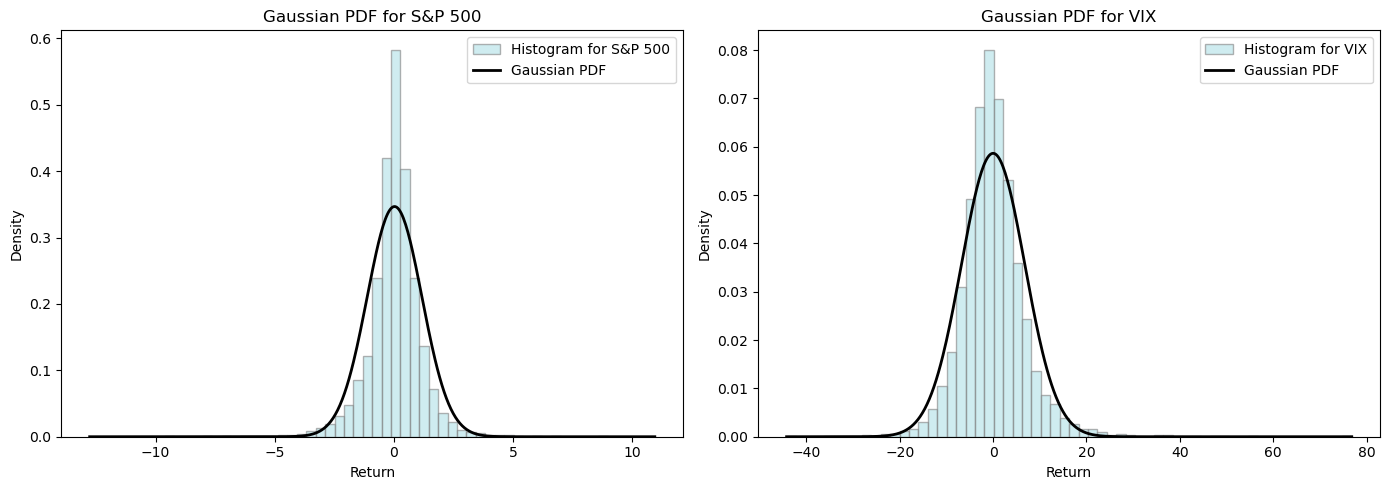

In [8]:
# fit gaussian pdfs for both variables
sp_gaussian_pdf = norm.pdf(sp_x, sp_mu, sp_sigma)
vix_gaussian_pdf = norm.pdf(vix_x, vix_mu, vix_sigma)

# create figure of two side by side sub-plots
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# plot sp histogram with fitted pdf on the left sub-plot
axes[0].hist(sp_returns, bins=60, density=True, alpha=0.6, label="Histogram for S&P 500", color="powderblue", 
             edgecolor="grey", linewidth=1)
axes[0].plot(sp_x, sp_gaussian_pdf, label="Gaussian PDF", linewidth=2, color="black")
axes[0].set_title("Gaussian PDF for S&P 500")
axes[0].set_xlabel("Return")
axes[0].set_ylabel("Density")
axes[0].legend()

# plot vix histogram with fitted pdf on the left sub-plot
axes[1].hist(vix_returns, bins=60, density=True, alpha=0.6, label="Histogram for VIX", color="powderblue", 
             edgecolor="grey", linewidth=1)
axes[1].plot(vix_x, vix_gaussian_pdf, label="Gaussian PDF", linewidth=2, color="black")
axes[1].set_title("Gaussian PDF for VIX")
axes[1].set_xlabel("Return")
axes[1].set_ylabel("Density")
axes[1].legend()

# display plot
plt.tight_layout()
plt.show()

For the S&P 500, the Gaussian curve does not align well with the histogram because the peak is too high and the tails are too light compared to the actual return distribution. For VIX, the mismatch is much larger since the Gaussian curve is far narrower and taller than the observed data, which reflects the much heavier tails and greater variability in VIX returns.

## If Skew-t model is selected

Older skew-t libraries is not compatible with Python 3.13. Have to code out manually.

In [9]:
# define skew-t pdf
def skewt_pdf(x, df, loc, scale, skew):
    y = (x - loc) / scale
    t_pdf = t.pdf(y, df)
    t_cdf = t.cdf(skew * y * np.sqrt((df + 1) / (df + y**2)), df + 1)
    return (2 / scale) * t_pdf * t_cdf

# define skew-t negative log likelihood function
def skewt_negloglik(params, data):
    df, loc, scale, skew = params
    if df <= 2 or scale <= 0:
        return np.inf
    pdf_vals = skewt_pdf(data, df, loc, scale, skew)
    if np.any(pdf_vals <= 0):
        return np.inf
    return -np.sum(np.log(pdf_vals))

# define skew-t fitting function
def skewt_fit(data):
    init = np.array([10, np.mean(data), np.std(data), 0.0])
    bounds = [(2.1, 200), (None, None), (1e-6, None), (-10, 10)]
    
    result = minimize(skewt_negloglik, init, args=(data,),
                      method="L-BFGS-B", bounds=bounds)
    return result.x

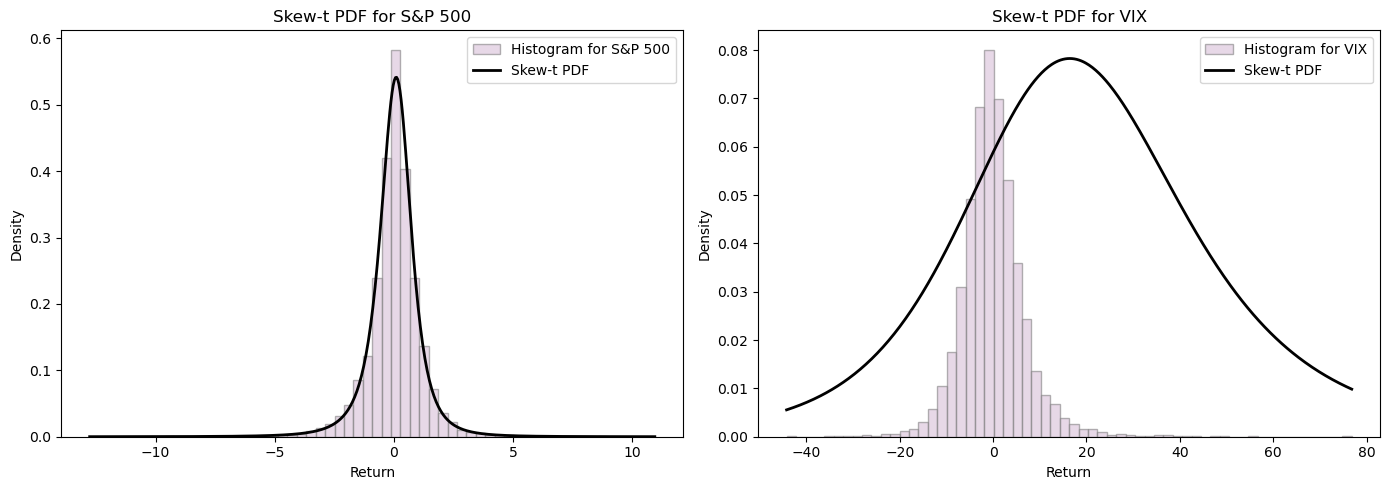

In [10]:
# fit skew-t for both variables
sp_df, sp_loc, sp_scale, sp_skew = skewt_fit(sp_returns)
vix_df, vix_loc, vix_scale, vix_skew = skewt_fit(vix_returns)

# compute skew-t pdfs for both variables
sp_skewt_pdf = skewt_pdf(sp_x, sp_df, sp_loc, sp_scale, sp_skew)
vix_skewt_pdf = skewt_pdf(sp_x, vix_df, vix_loc, vix_scale, vix_skew)

# create figure of two side by side sub-plots
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# plot sp histogram with fitted pdf on the left sub-plot
axes[0].hist(sp_returns, bins=60, density=True, alpha=0.6, label="Histogram for S&P 500", color="thistle", 
             edgecolor="grey", linewidth=1)
axes[0].plot(sp_x, sp_skewt_pdf, label="Skew-t PDF", linewidth=2, color="black")
axes[0].set_title("Skew-t PDF for S&P 500")
axes[0].set_xlabel("Return")
axes[0].set_ylabel("Density")
axes[0].legend()

# plot vix histogram with fitted pdf on the left sub-plot
axes[1].hist(vix_returns, bins=60, density=True, alpha=0.6, label="Histogram for VIX", color="thistle", 
             edgecolor="grey", linewidth=1)
axes[1].plot(vix_x, vix_skewt_pdf, label="Skew-t PDF", linewidth=2, color="black")
axes[1].set_title("Skew-t PDF for VIX")
axes[1].set_xlabel("Return")
axes[1].set_ylabel("Density")
axes[1].legend()

# display plot
plt.tight_layout()
plt.show()

The skew-t PDF fits the S&P 500 returns reasonably well, but for VIX the fitted curve does not align with the histogram. This indicates that the skew-t model does not capture the extreme volatility and tail behaviour in VIX returns, likely due to unusually large jumps or non-standard distributional features.

# Part 6

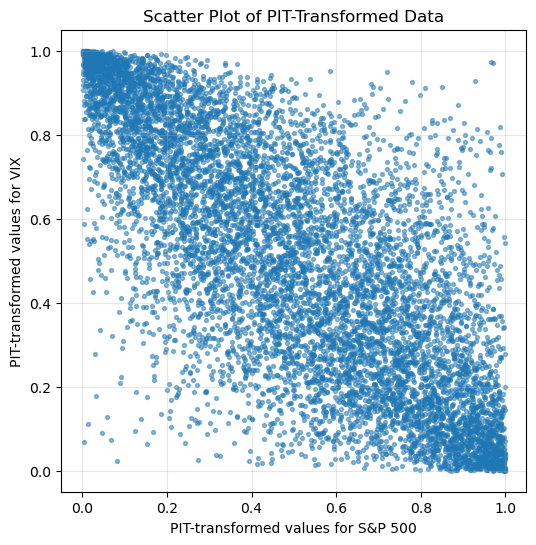

In [11]:
# compute empirical cdfs
sp_ecdf = stats.rankdata(sp_returns) / (len(sp_returns) + 1)
vix_ecdf = stats.rankdata(vix_returns) / (len(vix_returns) + 1)

# compute pit-transformed values
u_S = sp_ecdf
u_V = vix_ecdf

# create figure of one plot
plt.figure(figsize=(6,6))

# scatter plot of pit transformed values
plt.scatter(u_S, u_V, s=8, alpha=0.5)
plt.xlabel("PIT-transformed values for S&P 500")
plt.ylabel("PIT-transformed values for VIX")
plt.title("Scatter Plot of PIT-Transformed Data")
plt.grid(alpha=0.3)

# display plot
plt.show()

The PIT-transformed scatter plot shows a clear negative dependence between S&P 500 and VIX. High PIT values for S&P 500, corresponding to large positive returns, tend to align with low PIT values for VIX. On the other hand, low S&P PIT values align with high VIX PIT values. This reflects the well-known inverse relationship between equity markets and volatility.

### Save PIT transformed values as CSV for following parts

In [12]:
# combine pit transformed values to a df
pit_df = pd.DataFrame({
    "u_S": u_S,
    "u_V": u_V
})

# convert df to csv and save
pit_df.to_csv("csv files/pit_transformed_values.csv", index=False)